In [263]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [264]:
hotel_details=pd.read_csv('Hotel_details.csv',delimiter=',')
hotel_rooms=pd.read_csv('Hotel_Room_attributes.csv',delimiter=',')
hotel_cost=pd.read_csv('hotels_RoomPrice.csv',delimiter=',')

In [265]:
hotel_details.head()

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR
2,46408,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,2,http://www.booking.com/hotel/it/rifugio-sass-b...,EUR
3,46409,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,5,https://www.agoda.com/en-gb/madalena-hotel/hot...,EUR
4,46410,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,2,http://www.booking.com/hotel/it/pension-morenf...,EUR


In [266]:
hotel_rooms.head()

,id,hotelcode,roomamenities,roomtype,ratedescription
0,50677497,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed"
1,50672149,8328096,Air conditioning: ;Closet: ;Fireplace: ;Free W...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ..."
2,50643430,8323442,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ..."
3,50650317,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds"
4,50650318,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds"


In [267]:
del hotel_details['id']
del hotel_rooms['id']
del hotel_details['zipcode']

In [268]:
hotel_details=hotel_details.dropna()
hotel_rooms=hotel_rooms.dropna()

In [269]:
hotel_details.drop_duplicates(subset='hotelid',keep=False,inplace=True)

In [270]:
hotel_total=pd.merge(hotel_rooms,hotel_details,left_on='hotelcode',right_on='hotelid',how='inner')

In [271]:
hotel_total.columns


Index(['hotelcode', 'roomamenities', 'roomtype', 'ratedescription', 'hotelid',
       'hotelname', 'address', 'city', 'country', 'propertytype', 'starrating',
       'latitude', 'longitude', 'Source', 'url', 'curr'],
      dtype='object')

In [272]:
del hotel_total['hotelid']
del hotel_total['url']
del hotel_total['curr']
del hotel_total['Source']

In [273]:
hotel_total.columns

Index(['hotelcode', 'roomamenities', 'roomtype', 'ratedescription',
       'hotelname', 'address', 'city', 'country', 'propertytype', 'starrating',
       'latitude', 'longitude'],
      dtype='object')

In [274]:
hotel_total.head()

,hotelcode,roomamenities,roomtype,ratedescription,hotelname,address,city,country,propertytype,starrating,latitude,longitude
0,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed",The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Hotels,4,51.150921,-3.15847
1,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed",The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Hotels,4,51.150921,-3.15847
2,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Deluxe Double Room with Shower,"Room size: 17 m²/183 ft², Shower, 1 queen bed ...",The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Hotels,4,51.150921,-3.15847
3,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Superior Double Room,"Room size: 17 m²/183 ft², Shower, 1 double bed",The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Hotels,4,51.150921,-3.15847
4,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Standard Double or Twin Room,"Room size: 13 m²/140 ft², Shower, 1 queen bed ...",The Old Cider House,25 Castle Street,Nether Stowey,United Kingdom,Hotels,4,51.150921,-3.15847


In [275]:
hotel_total.shape

(145425, 12)

In [276]:
hotel_total.nunique()

hotelcode           8098
roomamenities      20716
roomtype            7743
ratedescription    12933
hotelname           7951
address             7877
city                4116
country               29
propertytype           5
starrating             3
latitude            8071
longitude           8087
dtype: int64

In [277]:
hotel_total['propertytype'].unique()

array(['Hotels', 'Resorts', 'Motels', 'Inns', 'Holiday parks'],
      dtype=object)

In [278]:
hotel_total['starrating'].unique()

array([4, 2, 3], dtype=int64)

In [279]:
# Drop unnecessary columns
hotel = hotel_total[['starrating', 'latitude', 'longitude', 'hotelcode', 'hotelname']]


In [280]:
hotel.head()

,starrating,latitude,longitude,hotelcode,hotelname
0,4,51.150921,-3.15847,634876,The Old Cider House
1,4,51.150921,-3.15847,634876,The Old Cider House
2,4,51.150921,-3.15847,634876,The Old Cider House
3,4,51.150921,-3.15847,634876,The Old Cider House
4,4,51.150921,-3.15847,634876,The Old Cider House


In [281]:
# Calculate average rating for each hotel and create a new column 'avg_rating'
hotel['avg_rating'] = hotel.groupby('hotelcode')['starrating'].transform('mean')


C:\Users\SAYAN\AppData\Local\Temp\ipykernel_16340\3545794560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel['avg_rating'] = hotel.groupby('hotelcode')['starrating'].transform('mean')


In [282]:
# Display the updated DataFrame

In [283]:
hotel.head()

,starrating,latitude,longitude,hotelcode,hotelname,avg_rating
0,4,51.150921,-3.15847,634876,The Old Cider House,4.0
1,4,51.150921,-3.15847,634876,The Old Cider House,4.0
2,4,51.150921,-3.15847,634876,The Old Cider House,4.0
3,4,51.150921,-3.15847,634876,The Old Cider House,4.0
4,4,51.150921,-3.15847,634876,The Old Cider House,4.0


In [284]:
# Remove duplicates based on 'hotelcode'
hotel = hotel.drop_duplicates(subset='hotelcode')

In [285]:
hotel.head()

,starrating,latitude,longitude,hotelcode,hotelname,avg_rating
0,4,51.150921,-3.158470,634876,The Old Cider House,4.0
10,2,51.511234,-0.185117,7975,Apollo Hotel London,2.0
17,3,48.116974,11.535338,59961,Hotel Rivoli,3.0
42,3,48.850101,2.292774,6825,Timhotel Tour Eiffel,3.0
62,4,53.469963,-2.282662,1198059,AC Hotel Manchester Salford Quays,4.0


In [298]:
#cheeking null values
hotel.isnull().sum()

starrating    0
latitude      0
longitude     0
hotelcode     0
hotelname     0
avg_rating    0
dtype: int64

In [286]:
df=hotel[['avg_rating', 'latitude', 'longitude']]

In [287]:
df.head()

,avg_rating,latitude,longitude
0,4.0,51.150921,-3.158470
10,2.0,51.511234,-0.185117
17,3.0,48.116974,11.535338
42,3.0,48.850101,2.292774
62,4.0,53.469963,-2.282662


In [288]:
# Standardize the 'starrating', 'latitude', and 'longitude' columns
scaler = StandardScaler()
df[['avg_rating', 'latitude', 'longitude']] = scaler.fit_transform(df[['avg_rating', 'latitude', 'longitude']])


C:\Users\SAYAN\AppData\Local\Temp\ipykernel_16340\3119369848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['avg_rating', 'latitude', 'longitude']] = scaler.fit_transform(df[['avg_rating', 'latitude', 'longitude']])


In [289]:
# Initialize a list to store inertia values for different K
inertia_values = []


In [290]:
# Define a range of K values to try
k_values = range(1, 31)

In [291]:
# Calculate inertia for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['avg_rating', 'latitude', 'longitude']])
    inertia_values.append(kmeans.inertia_)


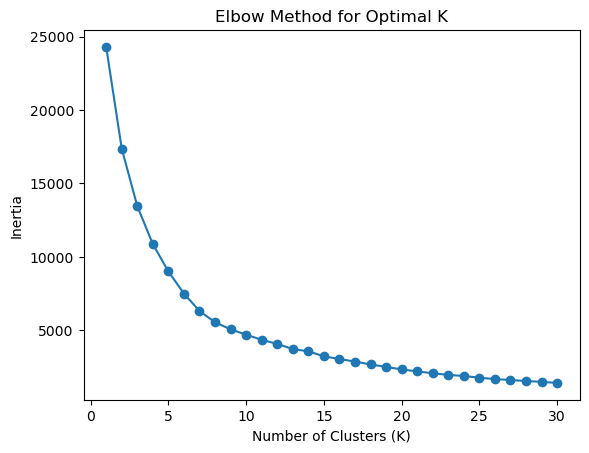

In [292]:
# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [293]:
# Create and fit K-means model
kmeans = KMeans(n_clusters=10,init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(df[['avg_rating', 'latitude', 'longitude']])


C:\Users\SAYAN\AppData\Local\Temp\ipykernel_16340\2674086426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(df[['avg_rating', 'latitude', 'longitude']])


In [294]:
# Compute silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df[['avg_rating', 'latitude', 'longitude']], df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.45237630513925103


In [295]:
# Build a BallTree for fast nearest neighbor search

from sklearn.neighbors import BallTree

tree = BallTree(df[['latitude', 'longitude']])

In [296]:
# Recommendation system function
def recommend_hotels(latitude, longitude, rating, top_n=5):
    user_data = pd.DataFrame({
        'avg_rating': [rating],
        'latitude': [latitude],
        'longitude': [longitude],
    })

    # Standardize user input
    user_data[['avg_rating', 'latitude', 'longitude']] = scaler.transform(user_data[['avg_rating', 'latitude', 'longitude']])

    # Predict cluster for user input
    user_cluster = kmeans.predict(user_data[['avg_rating', 'latitude', 'longitude']])[0]

    # Find nearest hotels using BallTree
    distances, indices = tree.query(user_data[['latitude', 'longitude']], k=top_n)

    # Get the top_n nearest hotels
    nearest_hotels = hotel.iloc[indices[0]].sort_values(by='avg_rating', ascending=False)
    
    return nearest_hotels[['hotelname', 'hotelcode', 'latitude', 'longitude', 'avg_rating']]


In [297]:
# Test the recommendation system
user_latitude = 37.7749  # Replace with user's actual latitude
user_longitude = -122.4194  # Replace with user's actual longitude
user_rating = 4.5  # Replace with user's rating preference

recommended_hotels = recommend_hotels(latitude=user_latitude, longitude=user_longitude, rating=user_rating)
print(recommended_hotels)

                     hotelname  hotelcode   latitude   longitude  avg_rating
20682           Antillia Hotel     120173  37.742489  -25.660530         4.0
15650   Hyatt Place Farmington    2676915  40.985092 -111.908966         3.0
105386            Hotel Matriz     894348  37.740471  -25.670771         3.0
110035   ANC Experience Resort     138916  37.713741  -25.511259         3.0
92821              Econo Lodge    3187889  35.465433  -84.645021         2.0
